In [1]:
import random
import math
import matplotlib.pyplot as plt
import pickle

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [26]:
samples = []

for i in range(500):
    x = random.randint(0, 100) + random.randint(-5, 5)
    y = random.randint(0, 100) + random.randint(-5, 5)
    samples.append([x,y])

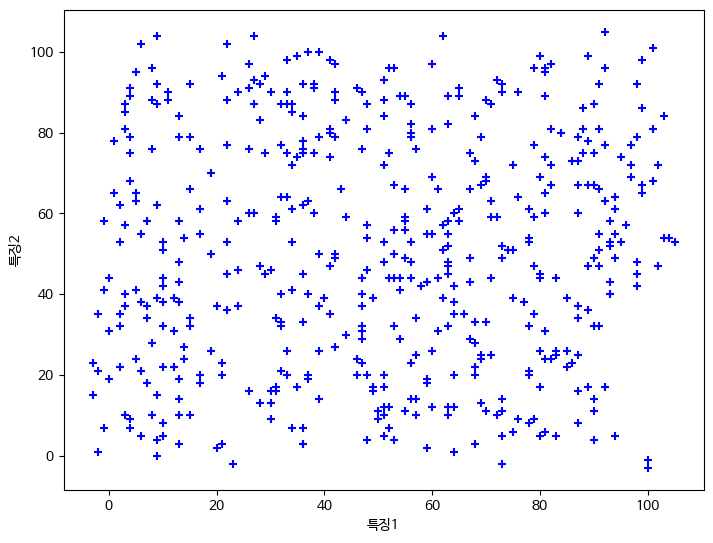

In [27]:
#samples
fig_0 = plt.figure(0)
ax = fig_0.add_axes([0,0,1,1])
ax.scatter(x = list(sample[0] for sample in samples),
           y = list(sample[1] for sample in samples),
           marker = '+', color = 'b')

ax.set_xlabel("특징1"); ax.set_ylabel("특징2")
pickle.dump(fig_0, open("samples_plot", 'wb'))

fig_0.canvas.draw()

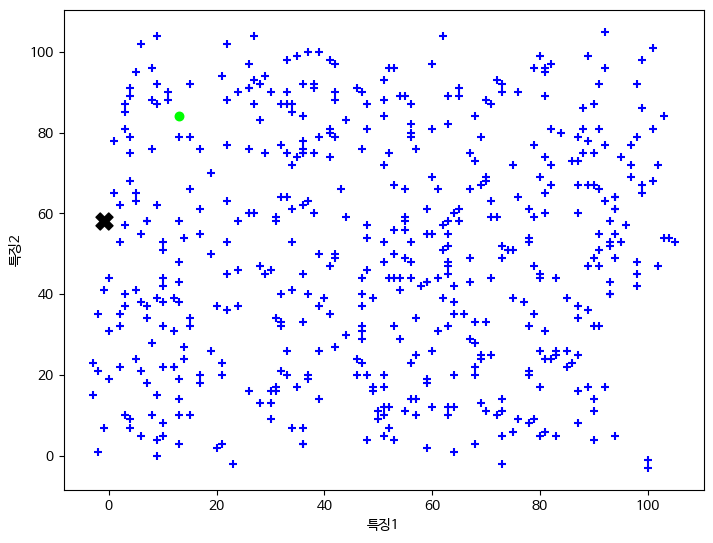

In [30]:
k = 2
c_k = []
markers = {0:'X', 1:'.', 2:'v', 3:'^', 4:'p', 5:'D', 6:'H'}
colors = {0:'black', 1:'lime', 2:'red', 3:'coral', 4:'hotpink', 5:'cyan', 6:'deepskyblue'}
'''
for i in range(k):
    x = random.randint(0, 100) + random.randint(-5, 5)
    y = random.randint(0, 100) + random.randint(-5, 5)
    c_k.append([x,y])
'''

for i in range(k):
    c_k.append(samples[random.randint(0, len(samples))])

figx = pickle.load(open("samples_plot", "rb"))
for index, value in enumerate(c_k):
    figx.axes[0].scatter(x = value[0], y =value[1],
                         marker = markers[index], color = colors[index], s=150)

plt.show()

0 범주 샘플 개수: 235
1 범주 샘플 개수: 265
before cx [[38, 26], [59, 71]]
after cx [[38, 26], [59, 71]]


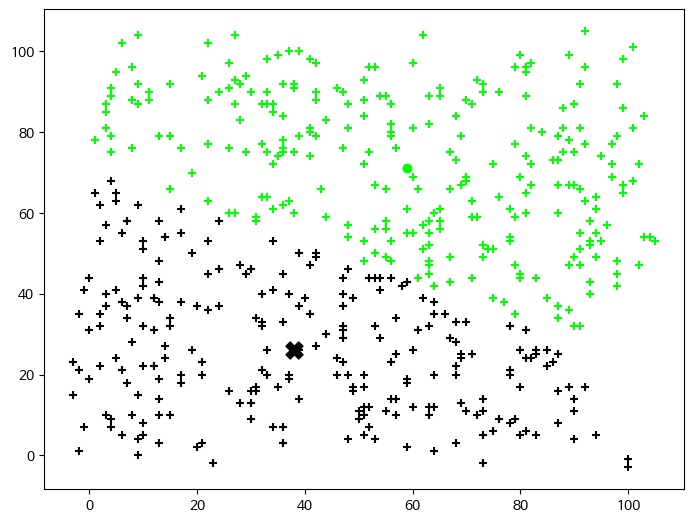

0 범주 샘플 개수: 235
1 범주 샘플 개수: 265
before cx [[38, 26], [59, 71]]
after cx [[38, 26], [59, 71]]


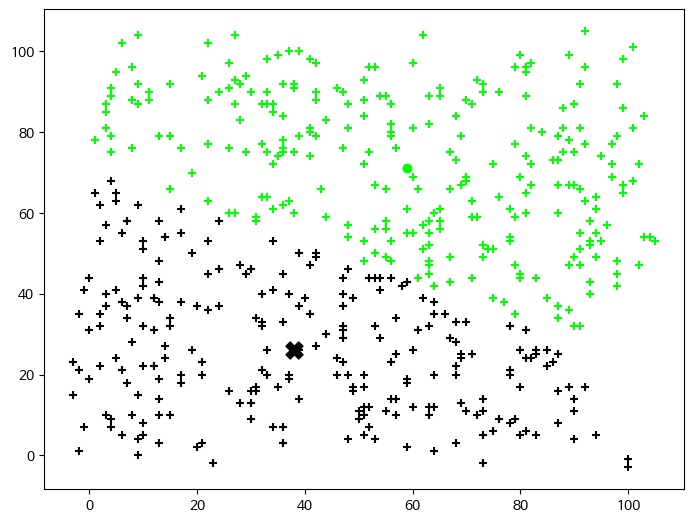

0 범주 샘플 개수: 235
1 범주 샘플 개수: 265
before cx [[38, 26], [59, 71]]
after cx [[38, 26], [59, 71]]


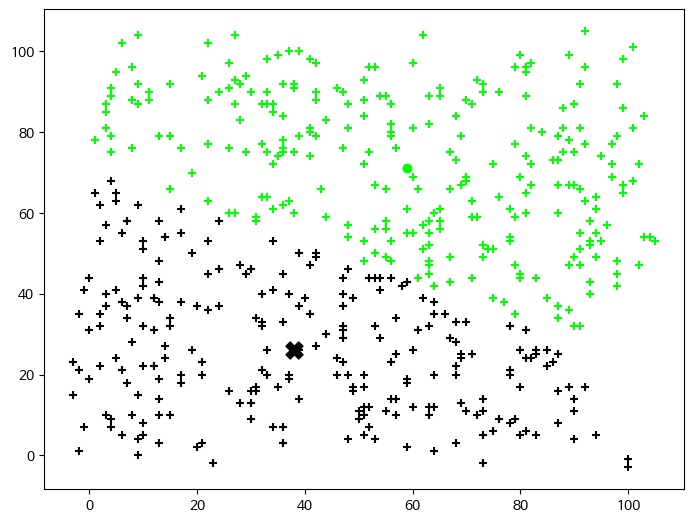

0 범주 샘플 개수: 235
1 범주 샘플 개수: 265
before cx [[38, 26], [59, 71]]
after cx [[38, 26], [59, 71]]


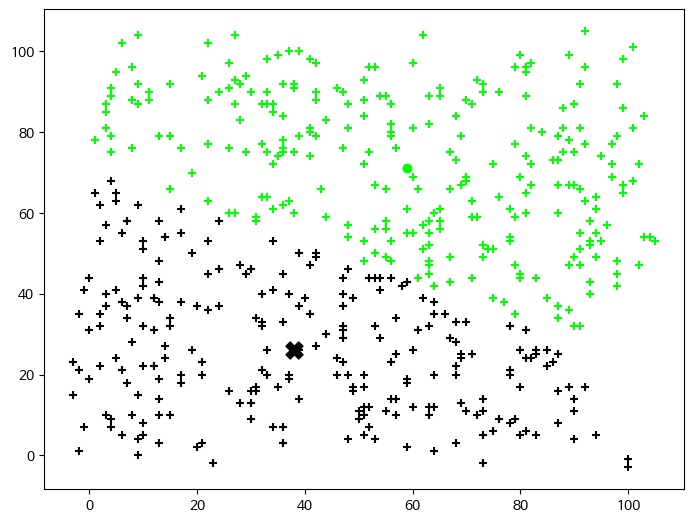

In [40]:
count = 0
max_loop = 3
c_history = []
for i in range(len(c_k)):
    c_history.append([c_k[i]])

while True:
    if count > max_loop:
        break
    #figx = pickle.load(open("samples_plot", "rb"))
    fig = plt.figure(0)
    ax = fig.add_axes([0,0,1,1])

    class_samples = []
    for i in range(len(c_k)):
        class_samples.append([])
    for sample in samples:
        dist_set = []
        for ck in c_k:
            dist = 0
            for index in range(len(ck)):
                dist = dist + math.pow(sample[index] - ck[index], 2)
            dist_set.append(dist)

        min_index = 0; min_value = dist_set[0]
        for index in range(1,len(dist_set)):
            if min_value > dist_set[index]:
                min_index = index
                min_value = dist_set[index]
        class_samples[min_index].append(sample)
        ax.scatter(x = sample[0], y =sample[1],
                             marker = '+',
                             color = colors[min_index])

    for index, value in enumerate(class_samples):
        print(f"{index} 범주 샘플 개수: {len(value)}")


    print("before cx", c_k)
    for index_cs in range(len(class_samples)):
        n_c = []
        for i in range(len(c_k[0])):
            n_c.append(0)
        for cs in class_samples[index_cs]:
            for i in range(len(cs)):
                n_c[i] = n_c[i] + cs[i]
        if len(class_samples[index_cs]) != 0:
            for i in range(len(c_k[0])):
                n_c[i] = int(n_c[i] / len(class_samples[index_cs]))
                c_k[index_cs][i] = int((c_k[index_cs][i] + n_c[i]) / 2)

    count = count + 1
    print("after cx", c_k)
    for i in range(len(c_k)):
        c_history[i].append(c_k[i])

    #figx = pickle.load(open("samples_plot", "rb"))
    for index, value in enumerate(c_k):
        ax.scatter(x = value[0], y =value[1],
                             marker = markers[index], color = colors[index], s=150)
    plt.show()

